# CIFAR-10 CNN Model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from tensorflow.keras.utils import plot_model

# Scikit-learn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# keras
!pip install Pillow==9.5.0
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.experimental import SGD,Adam

# Warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Load training and test data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# printing the shape 
print('The shape of train:',X_train.shape)
print('The shape of train_label:',y_train.shape)
print('The shape of test:',X_test.shape)
print('The shape of test_label:',y_test.shape)

The shape of train: (50000, 32, 32, 3)
The shape of train_label: (50000, 1)
The shape of test: (10000, 32, 32, 3)
The shape of test_label: (10000, 1)


I want to start by visualising some of the images. We can create a grid to show the first 9 images.

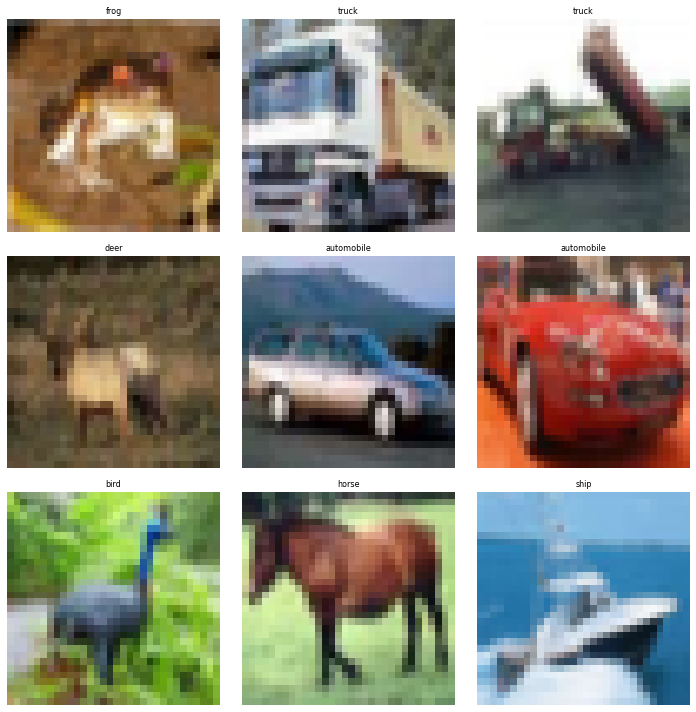

In [3]:
#Visualise imagines in a grid
W_grid = 3
L_grid = 3

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(W_grid * L_grid):
    # Access the subplot and image by index
    ax = axes[i // W_grid, i % W_grid]
    # Display an image at the current index
    ax.imshow(X_train[i])
    # Get the class label for the image and set it as the title of the subplot
    label_index = int(y_train[i])
    ax.set_title(labels[label_index], fontsize=8)
    # Turn off the axis
    ax.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()  # Display the figure

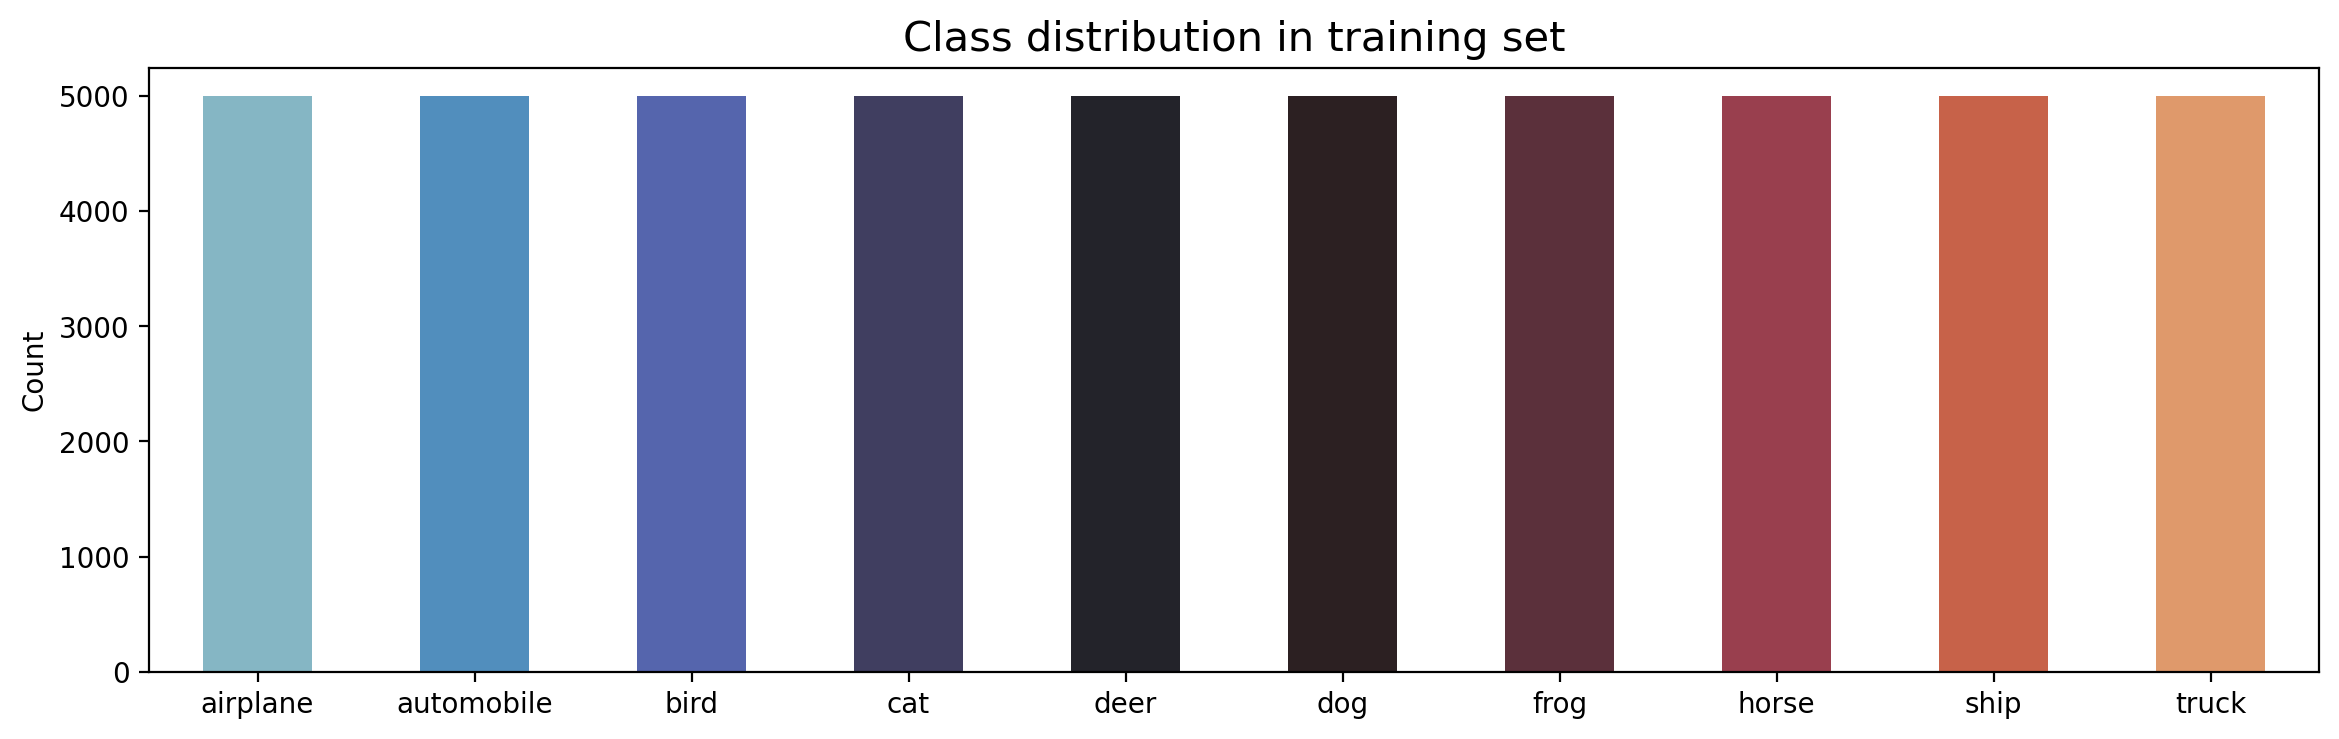

In [4]:
# Distribution for training set
label,count = np.unique(y_train,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in training set',fontsize=15)
plt.show()

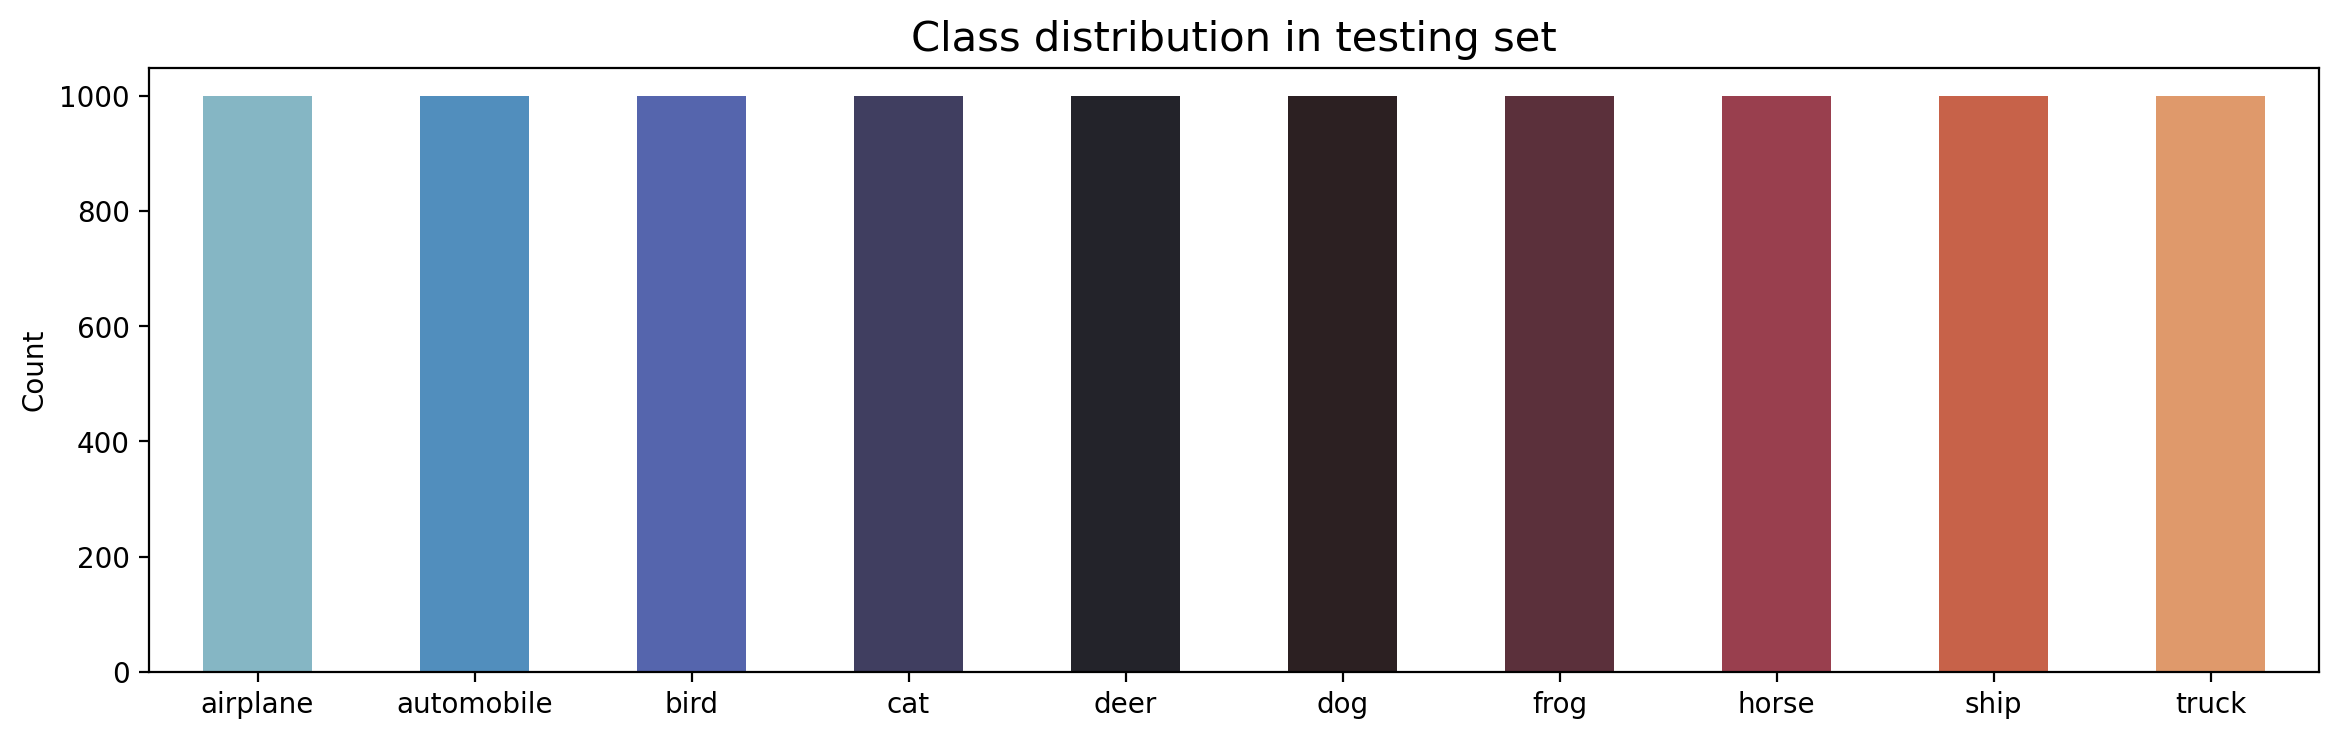

In [5]:
# Distribution for Testing dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in testing set',fontsize=15)
plt.show()

So we can see classes are split evenly around training and test split. 

## Data Preperation

In [6]:
# function to change the data type and normalise the data
def pre_process(data):
    #data = data.astype('float32')
    return data/255

# function to chnage the labels into categorical data
def to_cat(data):
    return to_categorical(data,num_classes=10)


# Noramlise the data
X_train = pre_process(X_train)
X_test = pre_process(X_test)

# to categorical data
y_train = to_cat(y_train)
y_test = to_cat(y_test)

In [7]:
# Split the original training data into new training and validation sets
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


## Deep Learning Model

### Base Model

In [8]:
#Baseline model
in_shape = X_train_new[0].shape
# Model 
base_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# b1
base_model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape,))
base_model.add(Conv2D(32,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))
# b2
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(Conv2D(64,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))
# b3
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(Conv2D(128,3,activation='relu',padding='same'))
base_model.add(MaxPool2D(2))

# Head of the model
base_model.add(Flatten())
base_model.add(Dense(128,activation='relu'))
base_model.add(Dense(10,activation='softmax'))

# compile
base_model.compile(optimizer= 'SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Model fit
base_history = base_model.fit(X_train_new,y_train_new,
                              batch_size = 128,
                              validation_data = (X_val,y_val),
                              epochs = 25,
                              verbose = 1
                             )

# model summary
print(base_model.summary())




Epoch 1/25


313/313 [==============================] - 27s 83ms/step - loss: 2.2693 - accuracy: 0.1305 - val_loss: 2.1909 - val_accuracy: 0.1842
Epoch 2/25
313/313 [==============================] - 25s 80ms/step - loss: 2.1157 - accuracy: 0.2307 - val_loss: 2.1467 - val_accuracy: 0.2352
Epoch 3/25
313/313 [==============================] - 25s 80ms/step - loss: 1.9312 - accuracy: 0.3155 - val_loss: 1.8201 - val_accuracy: 0.3460
Epoch 4/25
313/313 [==============================] - 25s 80ms/step - loss: 1.7576 - accuracy: 0.3758 - val_loss: 1.7040 - val_accuracy: 0.3986
Epoch 5/25
313/313 [==============================] - 26s 81ms/step - loss: 1.6510 - accuracy: 0.4132 - val_loss: 1.6519 - val_accuracy: 0.4104
Epoch 6/25
313/313 [==============================] - 26s 83ms/step - loss: 1.5691 - accuracy: 0.4442 - val_loss: 1.5441 - val_accuracy: 0.4514
Epoch 7/25
313/313 [==============================] - 30s 96ms/step - loss: 1.5049 - accuracy: 0.4674 - val_loss: 1.5428 - val_accu

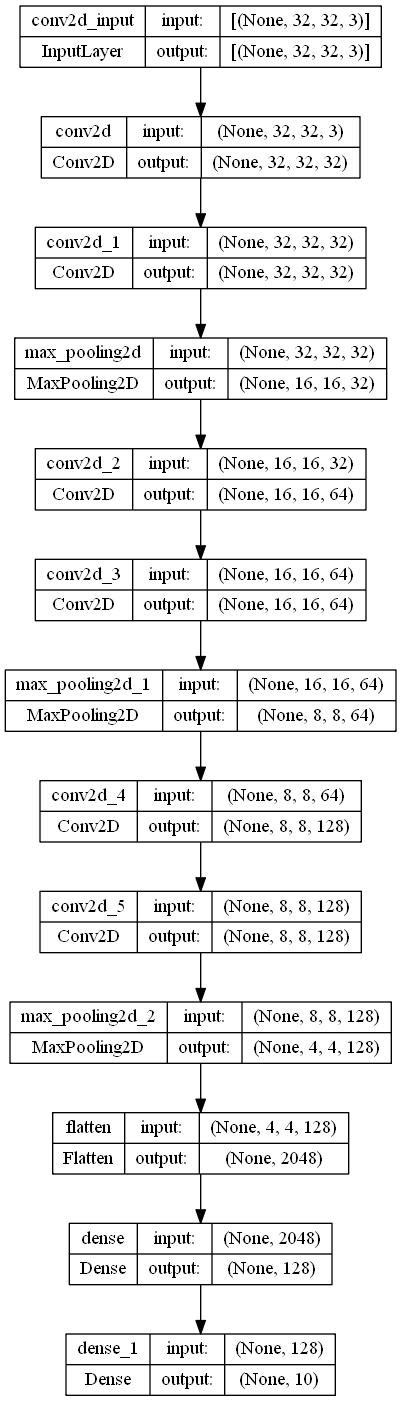

In [9]:
plot_model(base_model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

79/79 [==============================] - 2s 25ms/step - loss: 1.1704 - accuracy: 0.5999
The accuracy of the Base Model is: 59.99000072479248
The Loss of the Base Model is: 1.1703754663467407


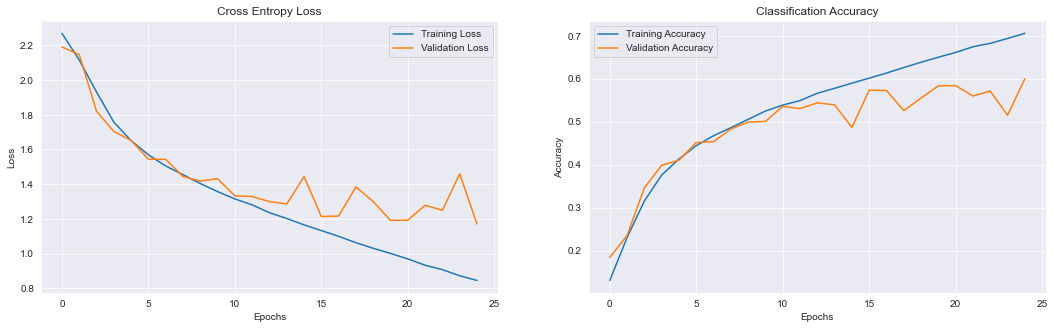

In [10]:
# Evaluvating base model
loss0,acc0=base_model.evaluate(X_val,y_val,batch_size = 128, verbose = 1)

print('The accuracy of the Base Model is:',acc0*100)
print('The Loss of the Base Model is:',loss0)

# plots for accuracy and Loss with epochs
sns.set_style('darkgrid')

error = pd.DataFrame(base_history.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'], label = 'Training Loss')
plt.plot(error['val_loss'], label = 'Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'], label = 'Training Accuracy')
plt.plot(error['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.show()

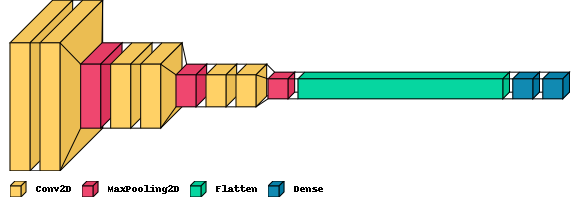

In [11]:
!pip install Pillow==9.5.0
visualkeras.layered_view(base_model, legend=True)


### Second model, adding dropout

In [12]:
# Model 
base_model1 = models.Sequential()

# 3 block vgg style model 

# block1
base_model1.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape,))
base_model1.add(Conv2D(32,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   # Add dropout to reduce overfitting

# block 2
base_model1.add(Conv2D(64,3,activation='relu',padding='same'))
base_model1.add(Conv2D(64,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   
# block 3
base_model1.add(Conv2D(128,3,activation='relu',padding='same'))
base_model1.add(Conv2D(128,3,activation='relu',padding='same'))
base_model1.add(MaxPool2D(2))
base_model1.add(Dropout(0.2))   

# Head of the model
base_model1.add(Flatten())
base_model1.add(Dense(128,activation='relu'))
base_model1.add(Dropout(0.2))      # Add dropout to reduce overfitting
base_model1.add(Dense(10,activation='softmax'))

# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model1.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# callback
early_stoping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Model fit
base_history1 = base_model1.fit(X_train_new,y_train_new,
                              batch_size = 128,
                              validation_data = (X_val,y_val),
                              epochs = 25,
                              callbacks=[early_stoping],
                              verbose = 1)
# model summary
base_model1.summary()

Epoch 1/25
313/313 [==============================] - 31s 97ms/step - loss: 2.1063 - accuracy: 0.2176 - val_loss: 1.9013 - val_accuracy: 0.3280
Epoch 2/25
313/313 [==============================] - 30s 97ms/step - loss: 1.7473 - accuracy: 0.3636 - val_loss: 1.6438 - val_accuracy: 0.4038
Epoch 3/25
313/313 [==============================] - 30s 97ms/step - loss: 1.5325 - accuracy: 0.4418 - val_loss: 1.3711 - val_accuracy: 0.5024
Epoch 4/25
313/313 [==============================] - 30s 96ms/step - loss: 1.3800 - accuracy: 0.5019 - val_loss: 1.2408 - val_accuracy: 0.5499
Epoch 5/25
313/313 [==============================] - 30s 97ms/step - loss: 1.2450 - accuracy: 0.5514 - val_loss: 1.1017 - val_accuracy: 0.6044
Epoch 6/25
313/313 [==============================] - 30s 97ms/step - loss: 1.1396 - accuracy: 0.5901 - val_loss: 1.0342 - val_accuracy: 0.6333
Epoch 7/25
313/313 [==============================] - 30s 97ms/step - loss: 1.0423 - accuracy: 0.6292 - val_loss: 0.9689 - val_accuracy:

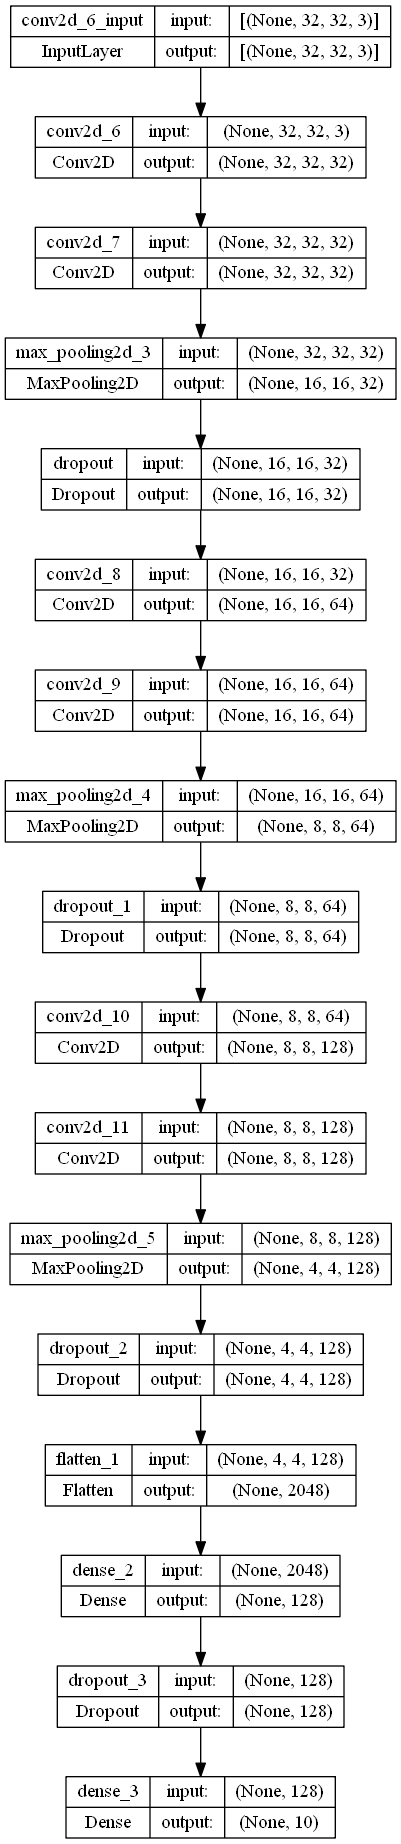

In [13]:
plot_model(base_model1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

79/79 [==============================] - 2s 24ms/step - loss: 0.6261 - accuracy: 0.7961
The accuracy of the Dropout Model is: 79.61000204086304
The Loss of the dropout Model is: 0.626118540763855


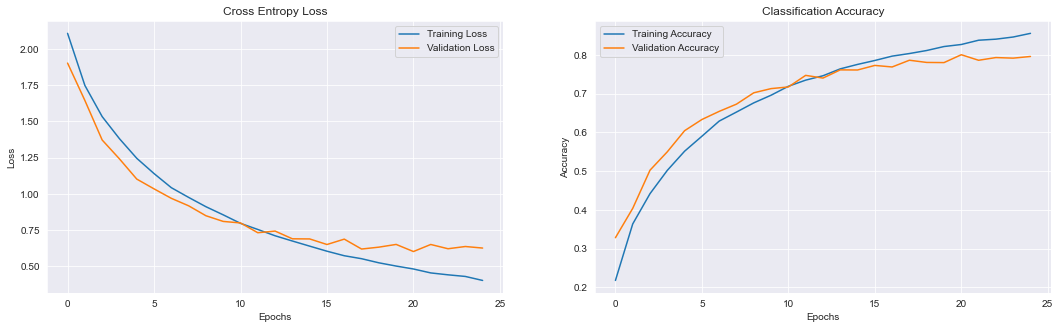

In [14]:
# Evaluvate second model
loss1,acc1=base_model1.evaluate(X_val,y_val,batch_size = 128, verbose = 1)

print('The accuracy of the Dropout Model is:',acc1*100)
print('The Loss of the dropout Model is:',loss1)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(base_history1.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'], label = 'Training Loss')
plt.plot(error['val_loss'], label = 'Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'], label = 'Training Accuracy')
plt.plot(error['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.show()

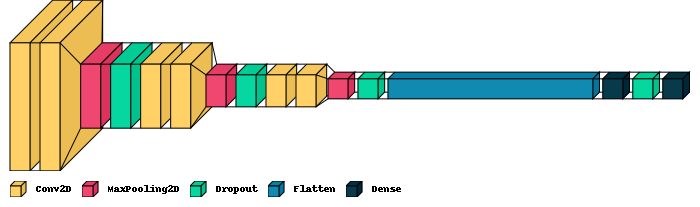

In [15]:
visualkeras.layered_view(base_model1, legend=True)

### Third Model, Adding Data Augmentation and Dropout

In [16]:
# Model 2
base_model2 = models.Sequential()

# 3 block vgg style model 

# block1
base_model2.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
base_model2.add(Conv2D(32,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# block 2
base_model2.add(Conv2D(64,3,activation='relu',padding='same'))
base_model2.add(Conv2D(64,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# block 3
base_model2.add(Conv2D(128,3,activation='relu',padding='same'))
base_model2.add(Conv2D(128,3,activation='relu',padding='same'))
base_model2.add(MaxPool2D(2))
base_model2.add(Dropout(0.2))

# Head of the model
base_model2.add(Flatten())
base_model2.add(Dense(128,activation='relu'))
base_model2.add(Dropout(0.2))
base_model2.add(Dense(10,activation='softmax'))


# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
base_model2.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                            )
train_gen = datagen.flow(X_train_new,y_train_new,batch_size=128)

# Model fit
base_history2 = base_model2.fit(train_gen,
                                steps_per_epoch = int(X_train_new.shape[0] // 128),
                                validation_data = (X_val,y_val),
                                epochs = 25,
                                verbose = 1)
# model summary
base_model2.summary()


Epoch 1/25
312/312 [==============================] - 35s 109ms/step - loss: 2.1231 - accuracy: 0.2128 - val_loss: 1.9769 - val_accuracy: 0.2714
Epoch 2/25
312/312 [==============================] - 38s 122ms/step - loss: 1.8563 - accuracy: 0.3199 - val_loss: 1.7112 - val_accuracy: 0.3779
Epoch 3/25
312/312 [==============================] - 37s 119ms/step - loss: 1.6494 - accuracy: 0.3986 - val_loss: 1.4717 - val_accuracy: 0.4638
Epoch 4/25
312/312 [==============================] - 34s 108ms/step - loss: 1.5259 - accuracy: 0.4447 - val_loss: 1.3327 - val_accuracy: 0.5190
Epoch 5/25
312/312 [==============================] - 34s 108ms/step - loss: 1.4261 - accuracy: 0.4826 - val_loss: 1.3427 - val_accuracy: 0.5154
Epoch 6/25
312/312 [==============================] - 34s 108ms/step - loss: 1.3509 - accuracy: 0.5132 - val_loss: 1.2059 - val_accuracy: 0.5714
Epoch 7/25
312/312 [==============================] - 34s 108ms/step - loss: 1.2769 - accuracy: 0.5414 - val_loss: 1.2236 - val_ac

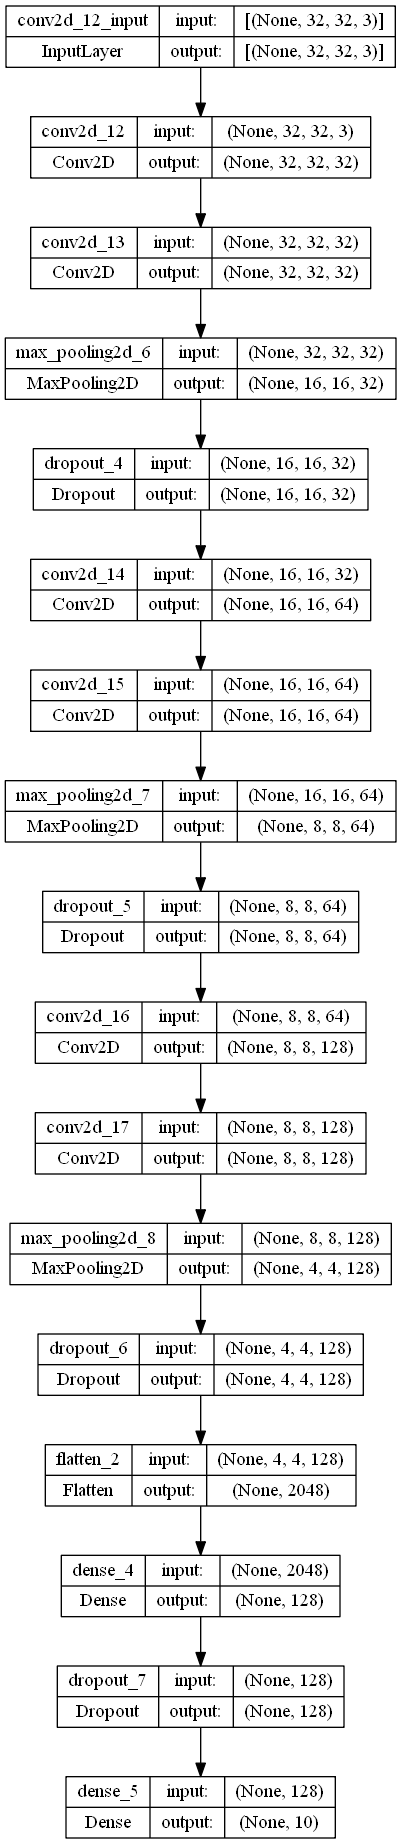

In [17]:
plot_model(base_model2, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

79/79 [==============================] - 2s 28ms/step - loss: 0.6350 - accuracy: 0.7772
The accuracy of the Third Model is: 77.71999835968018
The Loss of the Third Model is: 0.635032057762146


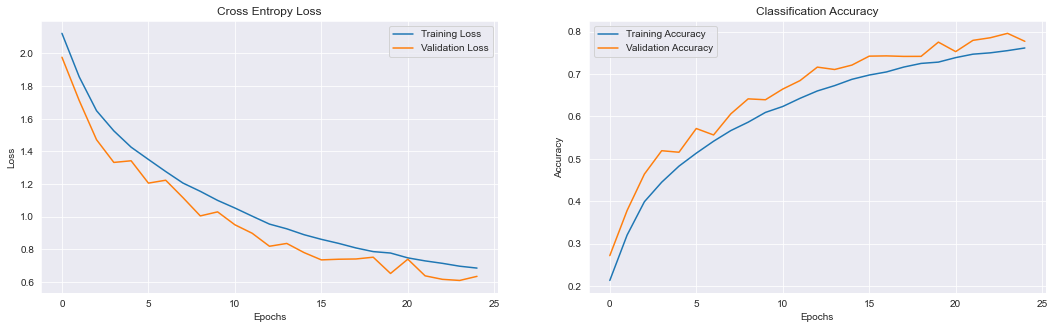

In [18]:
# Evaluvate third model
loss2,acc2=base_model2.evaluate(X_val,y_val,batch_size = 128, verbose = 1)

print('The accuracy of the Third Model is:',acc2*100)
print('The Loss of the Third Model is:',loss2)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(base_history2.history)

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'], label = 'Training Loss')
plt.plot(error['val_loss'], label = 'Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'], label = 'Training Accuracy')
plt.plot(error['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.show()


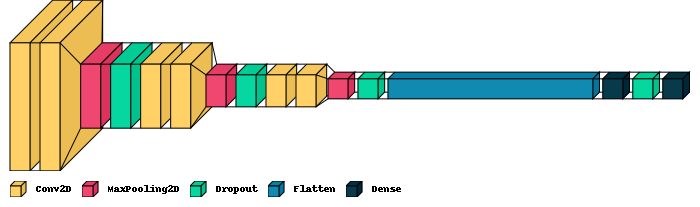

In [19]:
visualkeras.layered_view(base_model2, legend=True)

## Final Model, Adding Batch Normalisation, Data Augmentation and Dropout

In [20]:
model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block1
model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = in_shape))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
base_model.add(Dropout(0.2))  

# block 2
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.3))

# block 3
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(2))
model.add(Dropout(0.4))

# Head of the model
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

# compile
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

# callback
early_stoping = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Data Augementation
datagen = ImageDataGenerator(rotation_range=10,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                                )
train_gen = datagen.flow(X_train_new,y_train_new,batch_size=128)


# Model fit
model_history = model.fit(train_gen,
                          validation_data = (X_val,y_val),
                          epochs = 50,
                          callbacks=[early_stoping],
                          verbose = 1)
# model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

313/313 [==============================] - 40s 128ms/step - loss: 0.5329 - accuracy: 0.8172 - val_loss: 0.5344 - val_accuracy: 0.8274
Epoch 30/50
313/313 [==============================] - 40s 127ms/step - loss: 0.5316 - accuracy: 0.8175 - val_loss: 0.6608 - val_accuracy: 0.7885
Epoch 31/50
313/313 [==============================] - 40s 129ms/step - loss: 0.5213 - accuracy: 0.8219 - val_loss: 0.5604 - val_accuracy: 0.8155
Epoch 32/50
313/313 [==============================] - 40s 128ms/step - loss: 0.5123 - accuracy: 0.8249 - val_loss: 0.5731 - val_accuracy: 0.8098
Epoch 33/50
313/313 [==============================] - 40s 127ms/step - loss: 0.5093 - accuracy: 0.8249 - val_loss: 0.6084 - val_accuracy: 0.8067
Epoch 34/50
313/313 [==============================] - 40s 127ms/step - loss: 0.5010 - accuracy: 0.8282 - val_loss: 0.5380 - val_accuracy: 0.8202
Epoch 35/50
313/313 [==============================] - 40s 128ms/step - loss: 0.5016 - accuracy: 0.8274 - val_loss: 0.4828 - val_accurac

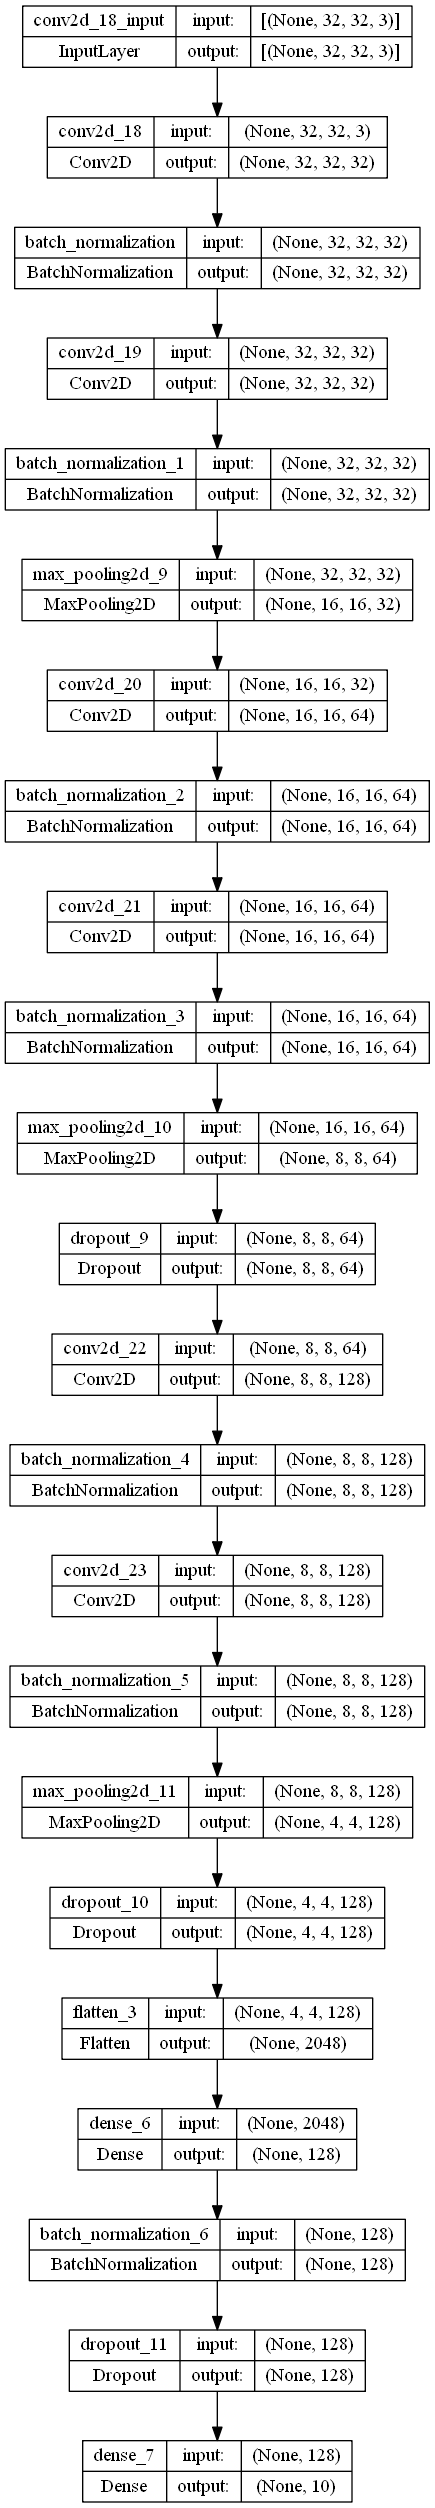

In [21]:
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

The accuracy of the Final Model is: 82.30999708175659
The Loss of the Final Model is: 0.5491158962249756


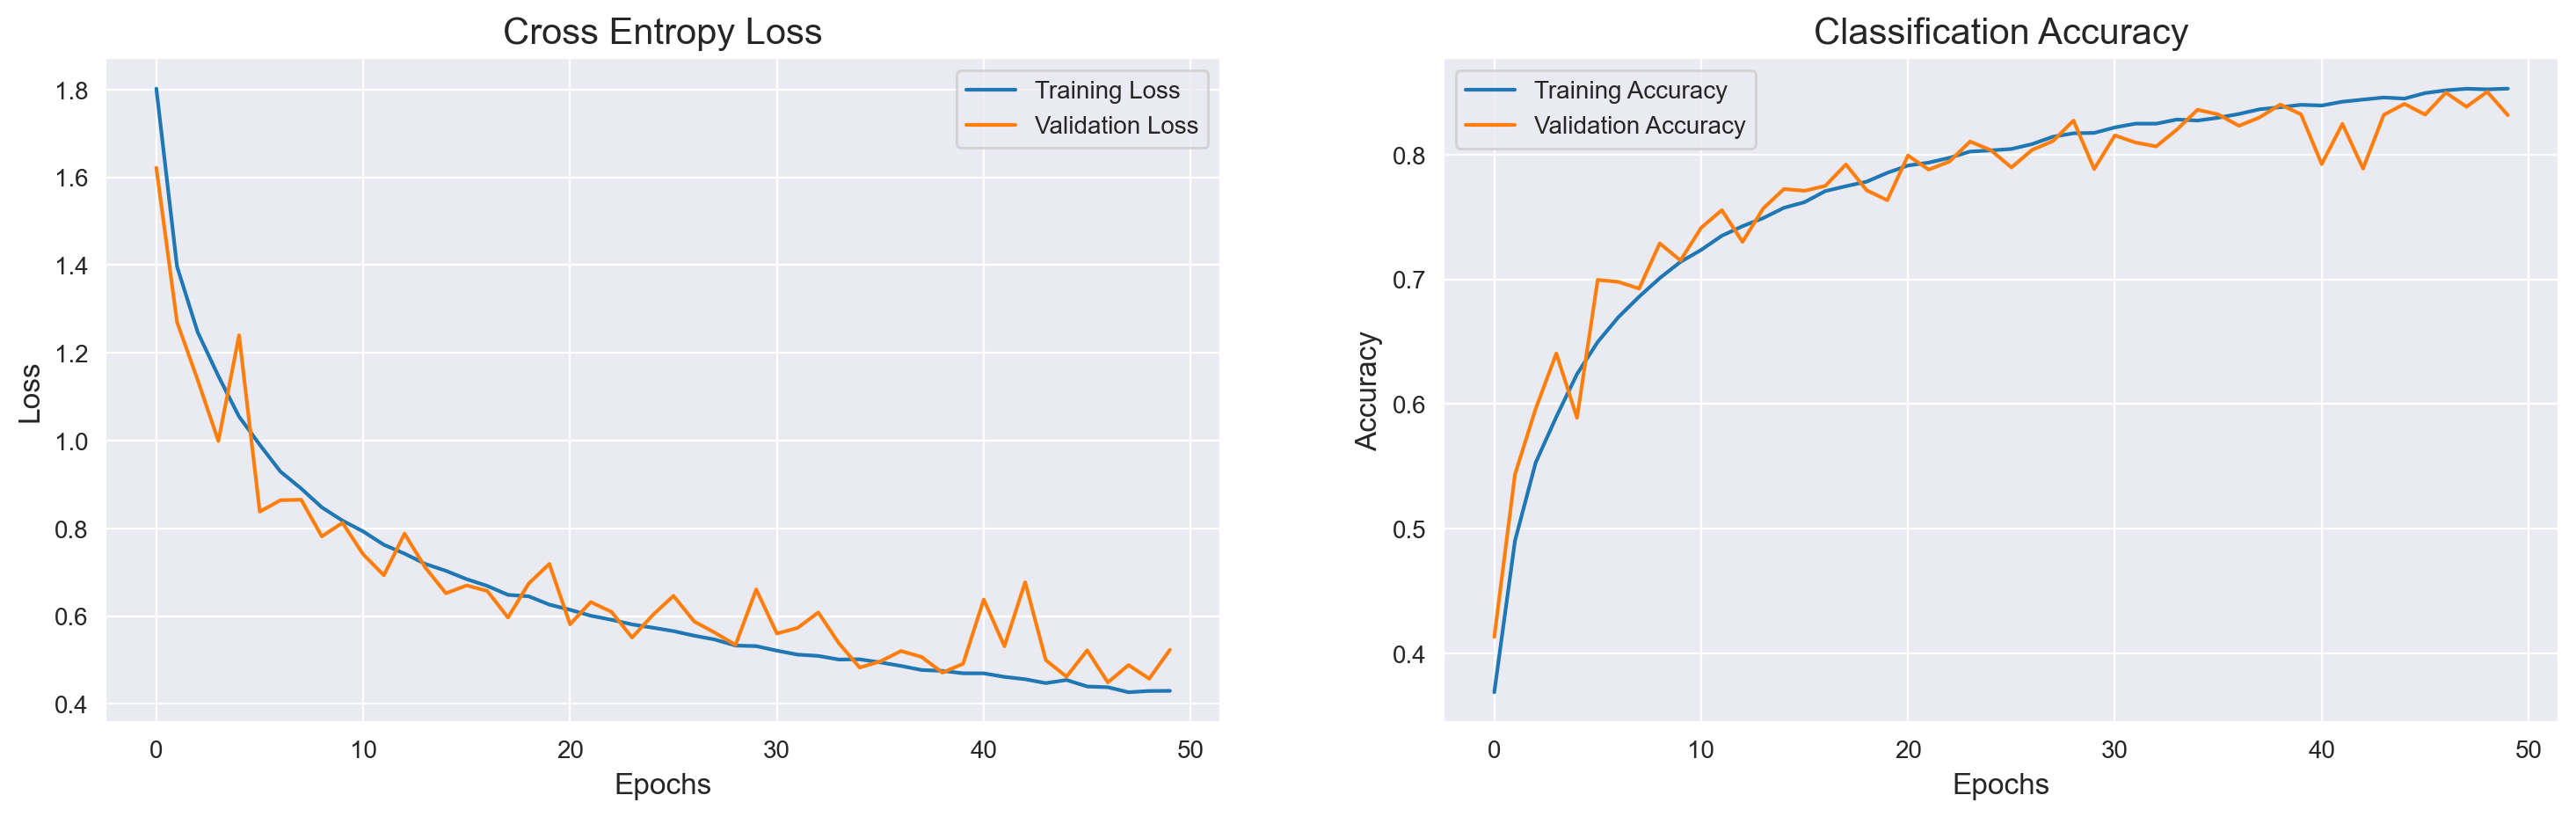

In [22]:
# Evaluvate
loss3,acc3 = model.evaluate(X_test,y_test,batch_size = 64, verbose = 0)

print('The accuracy of the Final Model is:',acc3*100)
print('The Loss of the Final Model is:',loss3)

# plots for accuracy and Loss with epochs

error = pd.DataFrame(model_history.history)

plt.figure(figsize=(18,5),dpi=200)

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'], label = 'Training Loss')
plt.plot(error['val_loss'], label = 'Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'], label = 'Training Accuracy')
plt.plot(error['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

plt.show()

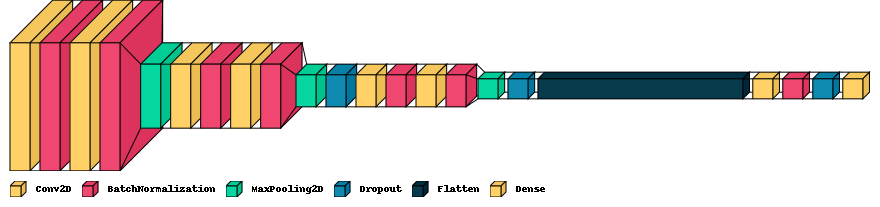

In [23]:
visualkeras.layered_view(model, legend=True)

## Evaluating Model on Test Data

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.5491 - accuracy: 0.8231


[0.5491157174110413, 0.8230999708175659]

## Evaluating different models, accuracy on validation data

In [25]:
accuracy = pd.DataFrame({'Model_name':['Base_model','Dropout','Data_augmentation + Dropout','Dropout + Data Augmentation + Batch Normalisation'],'Accuracy':[acc0*100,acc1*100,acc2*100,acc3*100]})
accuracy

,Model_name,Accuracy
0,Base_model,59.990001
1,Dropout,79.610002
2,Data_augmentation + Dropout,77.719998
3,Dropout + Data Augmentation + Batch Normalisation,82.309997


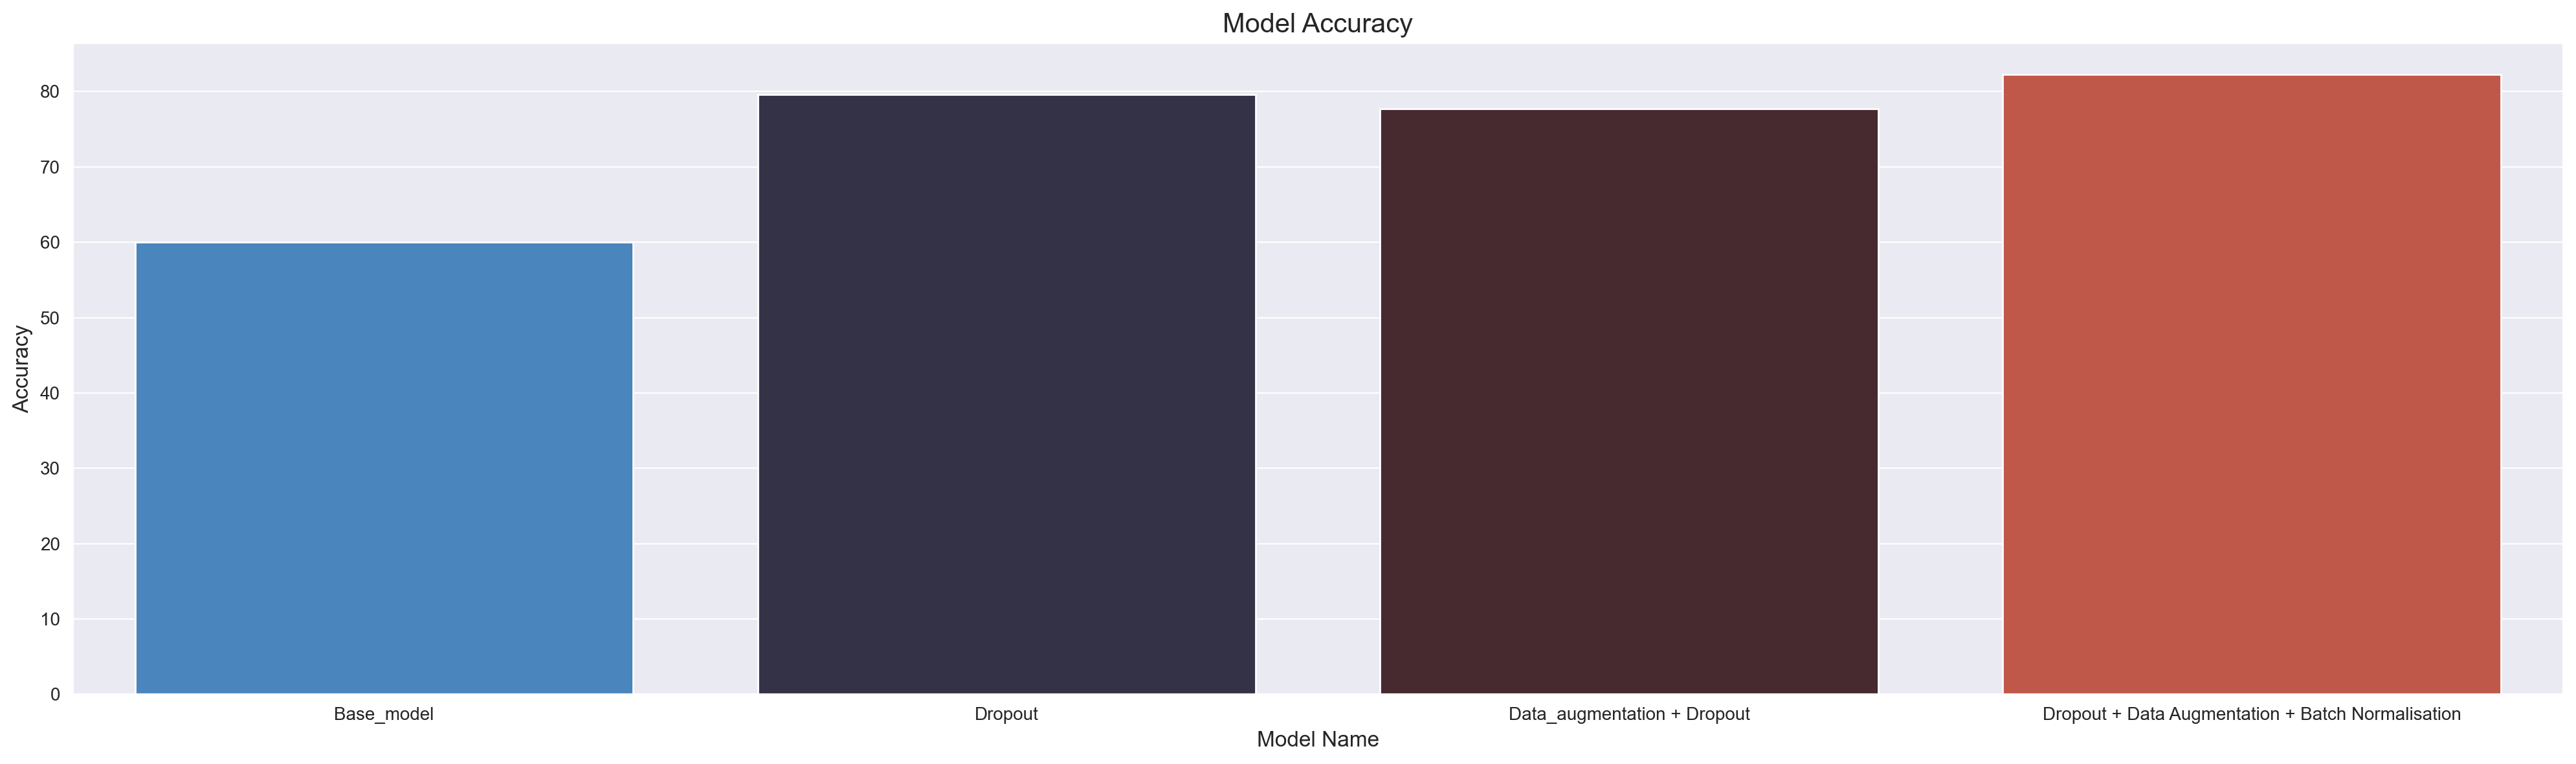

In [26]:
plt.figure(figsize=(20,6),dpi=200)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.barplot(data=accuracy,x='Model_name',y='Accuracy',palette='icefire')
plt.title('Model Accuracy',fontsize=15)
plt.xlabel('Model Name',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert y_test to class labels if it's one-hot encoded
y_test_labels = np.argmax(y_test, axis=1)

# Print the classification report
print(classification_report(y_test_labels, y_pred_labels))



313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1000
           1       0.91      0.95      0.93      1000
           2       0.79      0.76      0.77      1000
           3       0.80      0.58      0.67      1000
           4       0.77      0.80      0.78      1000
           5       0.86      0.68      0.76      1000
           6       0.62      0.96      0.76      1000
           7       0.88      0.87      0.88      1000
           8       0.92      0.92      0.92      1000
           9       0.89      0.92      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000

